In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.txt',sep='\t')
testX = pd.read_csv('test.txt',sep='\t')
testY = pd.read_csv('testY.txt',header = None)

In [3]:
data.head()

,CustomerSubtypesee,Numberofhouses,Avgsizehousehold,Avgagesee,Customermaintype,Romancatholicsee,Protestant...,Otherreligion,Noreligion,Married,...,Numberofprivate.1,Numberoffamily,Numberofdisability,Numberoffire,Numberofsurfboard,Numberofboat,Numberofbicycle,Numberofproperty,Numberofsocial,Numberofmobile
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
CustomerSubtypesee                        5822 non-null int64
Numberofhouses                            5822 non-null int64
Avgsizehousehold                          5822 non-null int64
Avgagesee                                 5822 non-null int64
Customermaintype                          5822 non-null int64
Romancatholicsee                          5822 non-null int64
Protestant...                             5822 non-null int64
Otherreligion                             5822 non-null int64
Noreligion                                5822 non-null int64
Married                                   5822 non-null int64
Livingtogether                            5822 non-null int64
Otherrelation                             5822 non-null int64
Singles                                   5822 non-null int64
Householdwithoutchildren                  5822 non-null int64
Householdwithchildren    

In [5]:
data.describe()

,CustomerSubtypesee,Numberofhouses,Avgsizehousehold,Avgagesee,Customermaintype,Romancatholicsee,Protestant...,Otherreligion,Noreligion,Married,...,Numberofprivate.1,Numberoffamily,Numberofdisability,Numberoffire,Numberofsurfboard,Numberofboat,Numberofbicycle,Numberofproperty,Numberofsocial,Numberofmobile
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


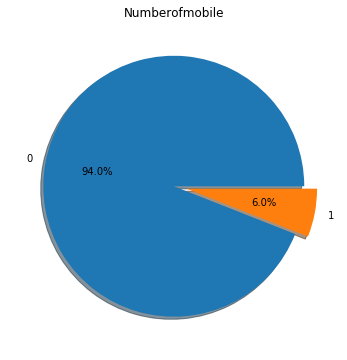

In [6]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data['Numberofmobile'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Numberofmobile')
ax.set_ylabel('')
plt.show()

In [7]:
data_avgage = data['Avgagesee'].value_counts()
data_avgage

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: Avgagesee, dtype: int64

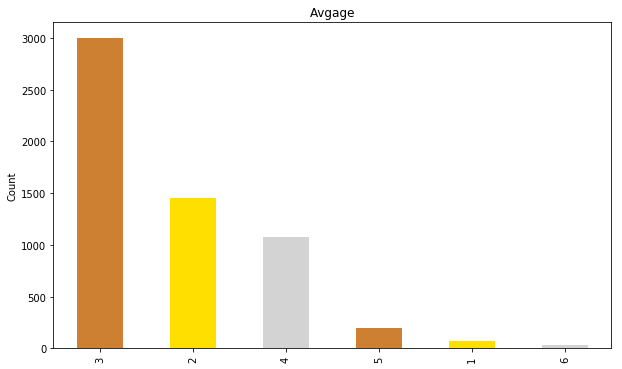

In [8]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data['Avgagesee'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
ax.set_title('Avgage')
ax.set_ylabel('Count')
plt.show()

In [9]:
data_numofhouse = data['Numberofhouses'].value_counts()
data_numofhouse

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: Numberofhouses, dtype: int64

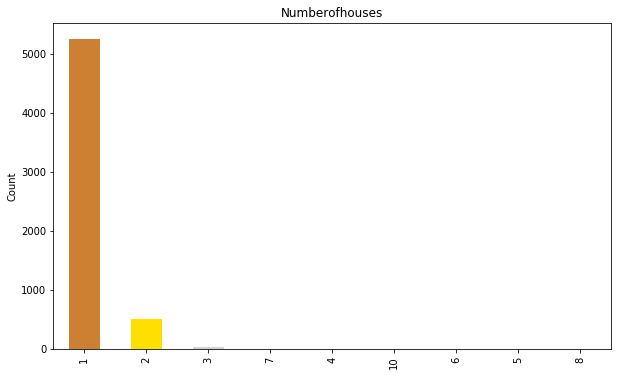

In [10]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data['Numberofhouses'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
ax.set_title('Numberofhouses')
ax.set_ylabel('Count')
plt.show()

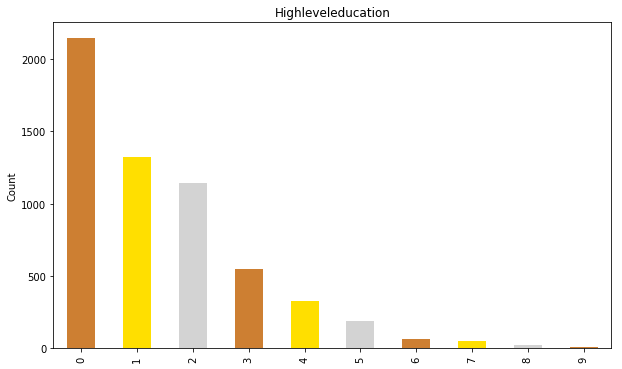

In [11]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data['Highleveleducation'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
ax.set_title('Highleveleducation')
ax.set_ylabel('Count')
plt.show()

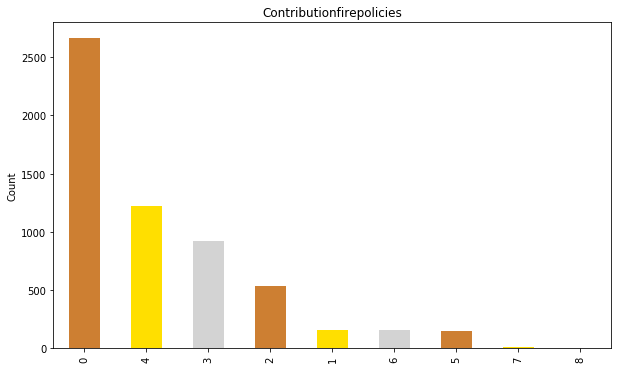

In [12]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data['Contributionfirepolicies'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
ax.set_title('Contributionfirepolicies')
ax.set_ylabel('Count')
plt.show()

In [13]:
features = [x for x in data.columns if x not in ['Numberofmobile']]
target = 'Numberofmobile'

In [14]:
X = data[features].copy()
y = data[target]

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn import metrics

In [17]:
predictions = lr.predict(testX)

In [18]:
print('accuracy_score:', metrics.accuracy_score(predictions, testY))

accuracy_score: 0.94


In [19]:
metrics.confusion_matrix(predictions, testY)

array([[3757,  235],
       [   5,    3]])

In [20]:
import statsmodels.api as sm
from scipy import stats

lr_model = LogisticRegression()
lr_model.fit(X,y)
params = np.append(lr_model.intercept_,lr_model.coef_)
predictions = lr_model.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilites
0         0.0636            0.462     0.138         0.890
1         0.0648            0.002    26.791         0.000
2        -0.1709            0.008   -20.733         0.000
3        -0.0396            0.008    -5.141         0.000
4         0.2017            0.005    37.857         0.000
5        -0.2721            0.011   -25.073         0.000
6        -0.1211            0.006   -20.126         0.000
7        -0.0282            0.007    -4.334         0.000
8        -0.0172            0.006    -2.940         0.003
9        -0.0685            0.006   -10.996         0.000
10        0.2235            0.008    27.566         0.000
11        0.0813            0.008    10.508         0.000
12        0.1434            0.008    17.495         0.000
13       -0.0643            0.007    -9.145         0.000
14       -0.0976            0.007   -13.584         0.000
15       -0.0560            0.007    -7.472         0.000
16        0.03

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


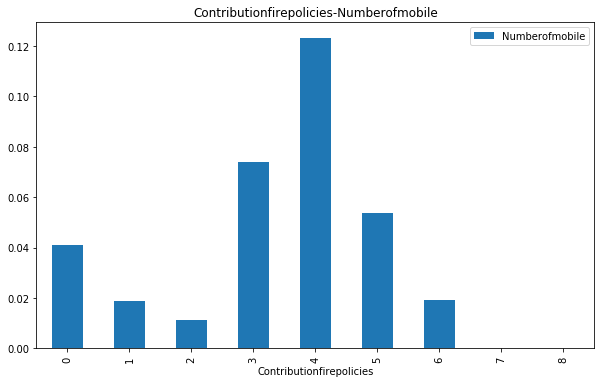

In [21]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data[['Contributionfirepolicies','Numberofmobile']].groupby(['Contributionfirepolicies']).mean().plot.bar(ax=ax)
ax.set_title('Contributionfirepolicies-Numberofmobile')
plt.show()

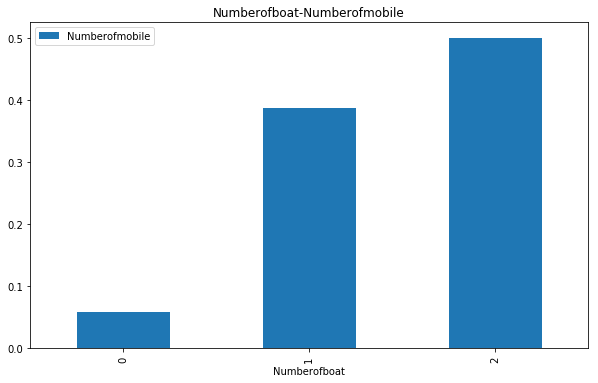

In [22]:
f,ax=plt.subplots(1,1,figsize=(10,6))
data[['Numberofboat','Numberofmobile']].groupby(['Numberofboat']).mean().plot.bar(ax=ax)
ax.set_title('Numberofboat-Numberofmobile')
plt.show()

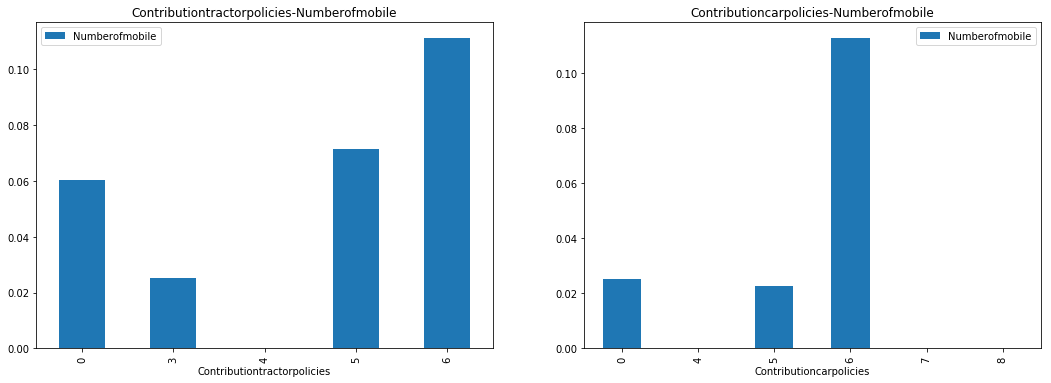

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,6))
data[['Contributiontractorpolicies',
      'Numberofmobile']].groupby(['Contributiontractorpolicies']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Contributiontractorpolicies-Numberofmobile')
data[['Contributioncarpolicies',
      'Numberofmobile']].groupby(['Contributioncarpolicies']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Contributioncarpolicies-Numberofmobile')
plt.show()